# First analysis:

### This notebook will be dedicated to unveil the surfeace insight of the real estate data 

In [157]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sb

In [179]:
df = pd.read_csv("../data/real_estate_28-06-2022_v2.csv")

['departamentos' 'casas' 'sitios' 'parcelas' 'oficinas' 'locales'
 'terrenos' 'industriales' 'agrícolas' 'bodegas' 'otros inmuebles'
 'estacionamientos' 'loteos' 'lotes de cementerio']


oferta                                                           venta
propiedad                                                      locales
monto                                                               29
moneda                                                              uf
direccion            av. la dehesa / el rodeo comercial, la dehesa,...
inmobiliaria                                                       NaN
comentario                    local comercial en venta en lo barnechea
comuna                                                    lo barnechea
unidad_medida                                                       m²
min_n_dormitorios                                                  NaN
max_n_dormitorios                                                  NaN
min_n_baños                                                        NaN
max_n_baños                                                        NaN
min_area                                                         240.0
max_ar

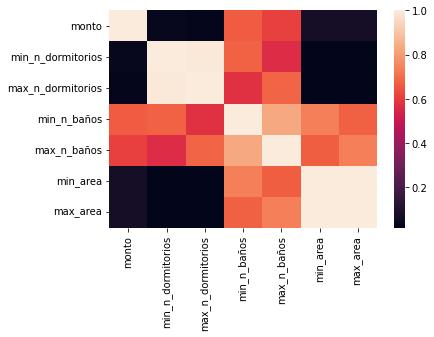

In [180]:
print(df["propiedad"].unique())
df = df.loc[df["oferta"]=="venta",:]
corr = df.loc[df["propiedad"]=="casas",:].corr()
sb.heatmap(corr)

In [160]:
ha_mask = df["unidad_medida"] == "ha"
df.loc[ha_mask, "area_m2"] = df.loc[ha_mask, "min_area"] * 10000
df.loc[[not ha for ha in ha_mask], "area_m2"] = df.loc[[not ha for ha in ha_mask], "min_area"] 
df.loc[ha_mask,"area_m2"]

4038         30000.0
4041         30000.0
4055        510000.0
4059      11450000.0
4076     105450000.0
            ...     
19906      5000000.0
19910     50000000.0
19911     50000000.0
19912     50000000.0
19913        20000.0
Name: area_m2, Length: 881, dtype: float64

In [161]:
# Gives the mean of each numerical value in this case I'm interested in price per squared meter. 
# The Dataframe is grouped by comuna and only "casas" are selected as the propertie feature.

df.loc[df["moneda"]=="$", "UF"] = df.loc[df["moneda"]=="$", "monto"] * 1/33165 # 33.165 CLP x UF | 06-07-2022
df.loc[df["moneda"]=="u$s", "UF"] = df.loc[df["moneda"]=="u$s", "monto"] * 976.65 / 33165 # 976.65 CLP x USD | 06-07-2022
df.loc[df["moneda"]=="uf", "UF"] = df.loc[df["moneda"]=="uf", "monto"]
df["UF_m2"] = df["UF"] / df["area_m2"] # UF per squared meter

Merging with communes dataset to compare by region.

In [162]:
comm_df = pd.read_csv("../data/communes_of_chile.csv")
meangroup_comm = df.loc[df["propiedad"]=="terrenos",:].groupby(by=["comuna"], as_index=False).mean()

In [163]:
# Here I'm interested in the specifical reagion of each commune, so I can plot the together as a hue value.
mean_withregion = meangroup_comm.merge(right=comm_df.drop(columns=["provincia", "cut"]))
mean_withregion = mean_withregion.loc[mean_withregion["región"] != "tarapacá",:]

<AxesSubplot:xlabel='región', ylabel='UF_m2'>

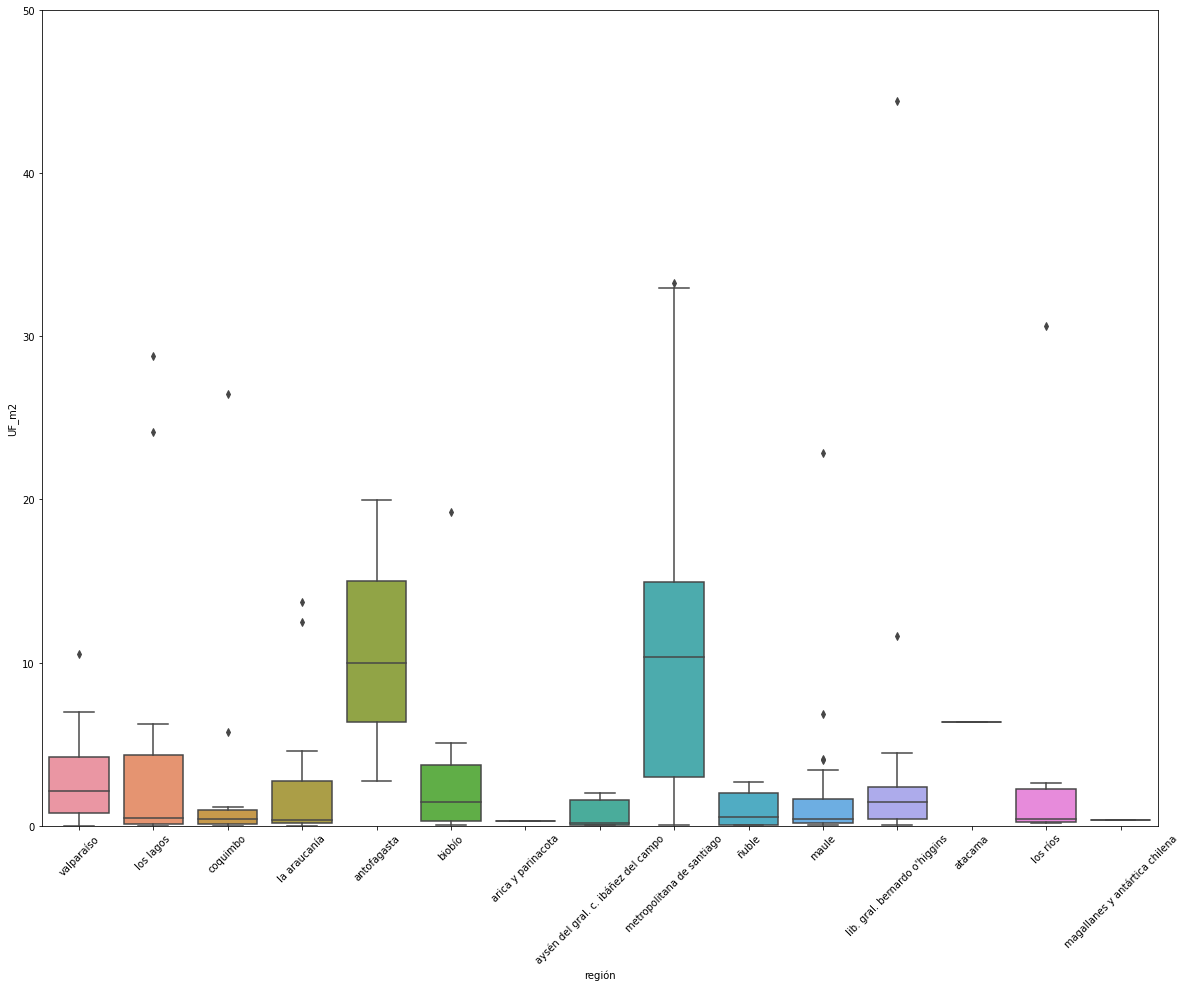

In [164]:
fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,50])
sb.boxplot(data=mean_withregion, x="región", y="UF_m2", ax=ax)

Now, I'll be focusing in a particular region. In this next code box, we'll be studying 'Los Lagos' region.

<AxesSubplot:xlabel='comuna', ylabel='UF_m2'>

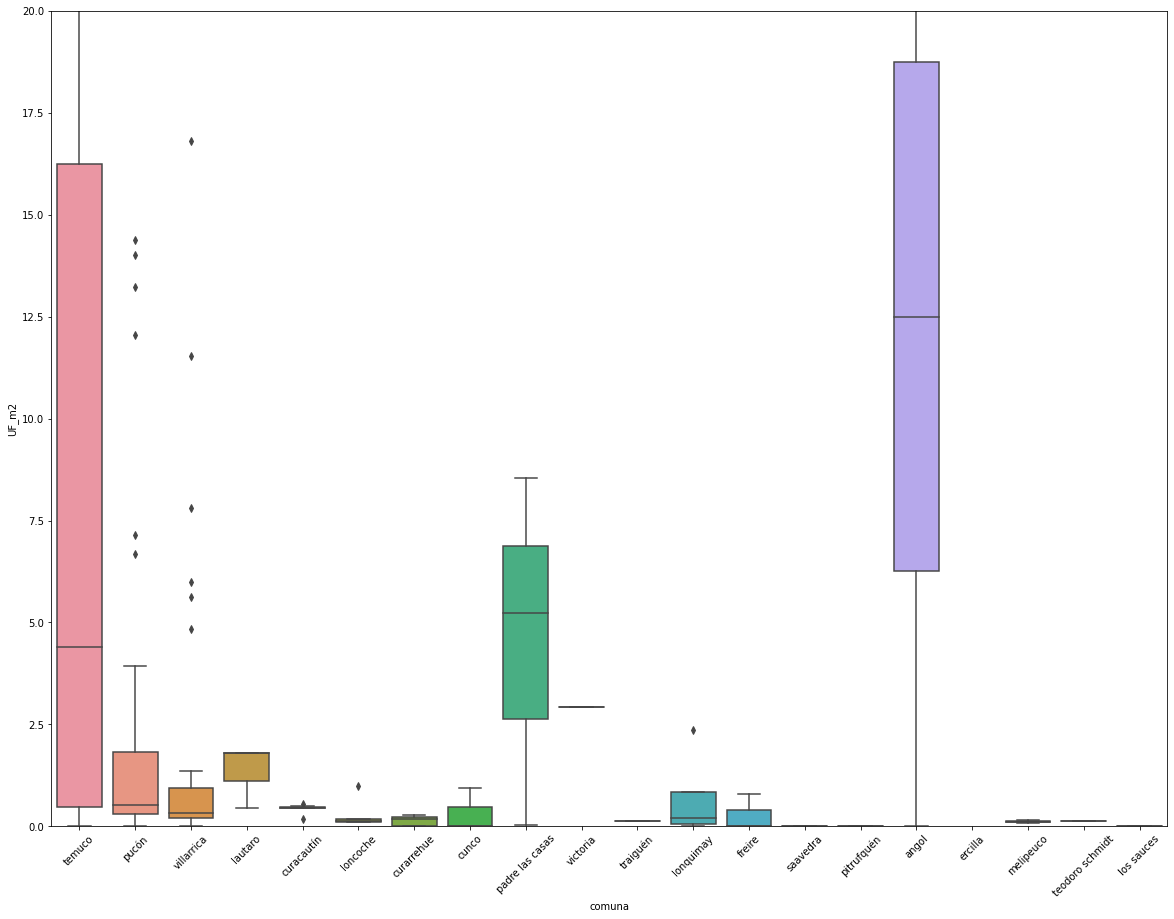

In [169]:
# Only 'ventas' or sells, merge with communes dataset to identify regions. In the third row next, propperties of interest are displayed.
comm_merge = df.merge(comm_df)
sells_mask = np.all([comm_merge["región"]=="la araucanía", \
    np.any([comm_merge["propiedad"]=="terrenos",comm_merge["propiedad"]=="terrenos"], axis=0)], \
        axis=0)

fig, ax = plt.subplots(1 , figsize=(20,15))
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0,20])

region = comm_merge.loc[sells_mask, :]
sb.boxplot(data=region, x="comuna", y="UF_m2", ax=ax)

In [200]:
region.loc[region["comuna"]=="pucón",["direccion","area_m2","comentario","UF","UF_m2"]].sort_values(by="UF_m2")
#len(df.index)
region.iloc[1,:]

oferta                                                            venta
propiedad                                                      terrenos
monto                                                                 7
moneda                                                               uf
direccion             paño de 5 hectáreas en sector santa delia, cal...
inmobiliaria                                                        NaN
comentario            se vende terreno construccion de 5 hectáreas e...
comuna                                                           temuco
unidad_medida                                                        m²
min_n_dormitorios                                                   NaN
max_n_dormitorios                                                   NaN
min_n_baños                                                         NaN
max_n_baños                                                         NaN
min_area                                                        